In [1]:
import random

import matplotlib.pyplot as plt
from matplotlib import rcParams
import networkx as nx
import numpy as np
import powerlaw
import seaborn as sns
from skimage.transform import resize
from tqdm.notebook import tqdm

In [2]:
SEED = 42

np.random.seed(SEED)
random.seed(SEED)

In [3]:
DARK_BLUE_COLOR = "#131B6A"
BLUE_COLOR = "#393BD1"
YELLOW_COLOR = "#FCCB2F"
LIGHT_COLOR = "#FBFBFB"
GREEN_COLOR = "#038C48"
RED_COLOR = "#C70000"

GRAY_COLOR = "#CCCCCC"

In [4]:
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Roboto"]
rcParams["font.size"] = 7
rcParams["figure.dpi"] = 300
rcParams["axes.labelsize"] = 15
rcParams["axes.labelweight"] = "bold"
# rcParams["xtick.color"] = GRAY_COLOR


# Изображение 3.11, Барабаши
![Figure-3-11-Newman](http://networksciencebook.com/images/ch-03/figure-3-11.jpg)

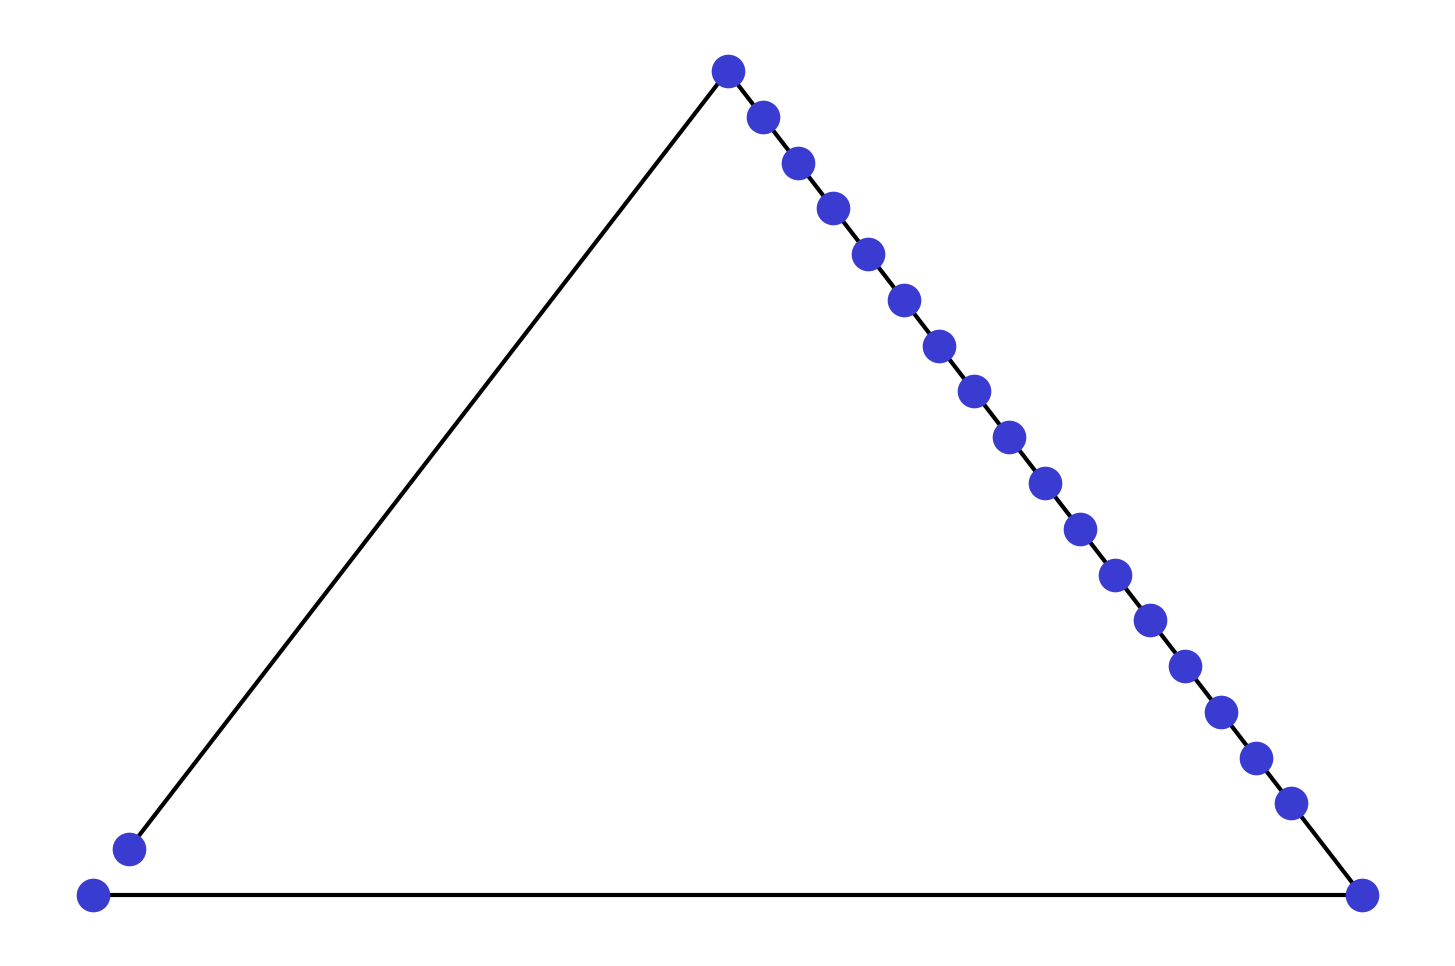

In [5]:
fig = plt.figure()
ax = fig.subplots()
G = nx.grid_graph(dim=(1, 20))
nx.draw_planar(G, node_size=50, ax=ax, node_color=BLUE_COLOR)
fig.savefig("images/1d_lattice.png")

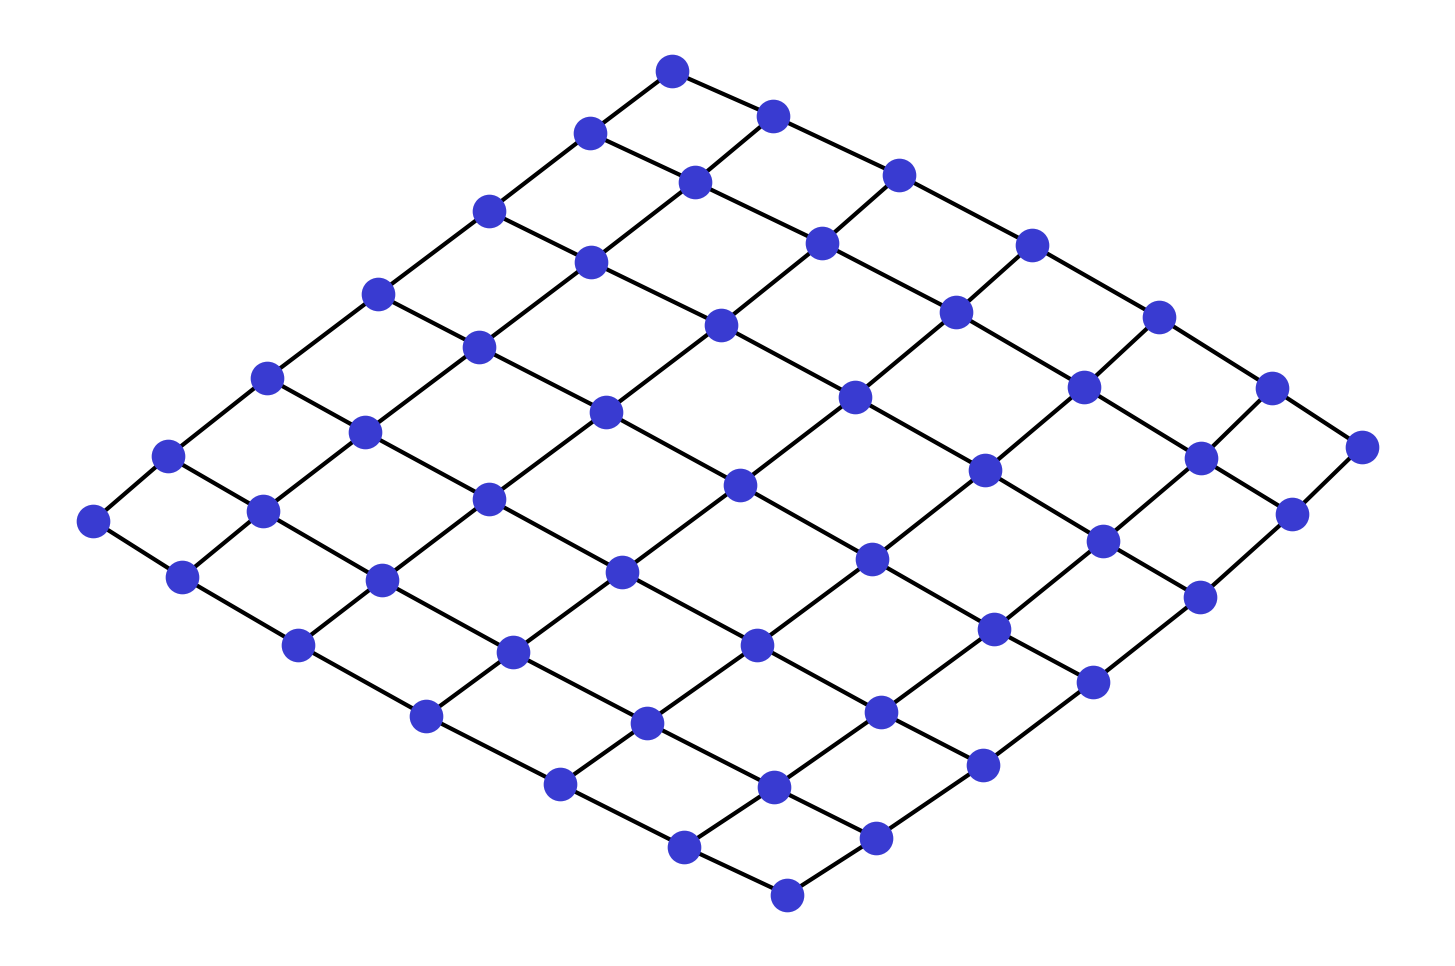

In [6]:
fig = plt.figure()
ax = fig.subplots()
G = nx.grid_graph(dim=(7, 7))
nx.draw(G, node_size=50, ax=ax, node_color=BLUE_COLOR)
fig.savefig("images/2d_lattice.png")

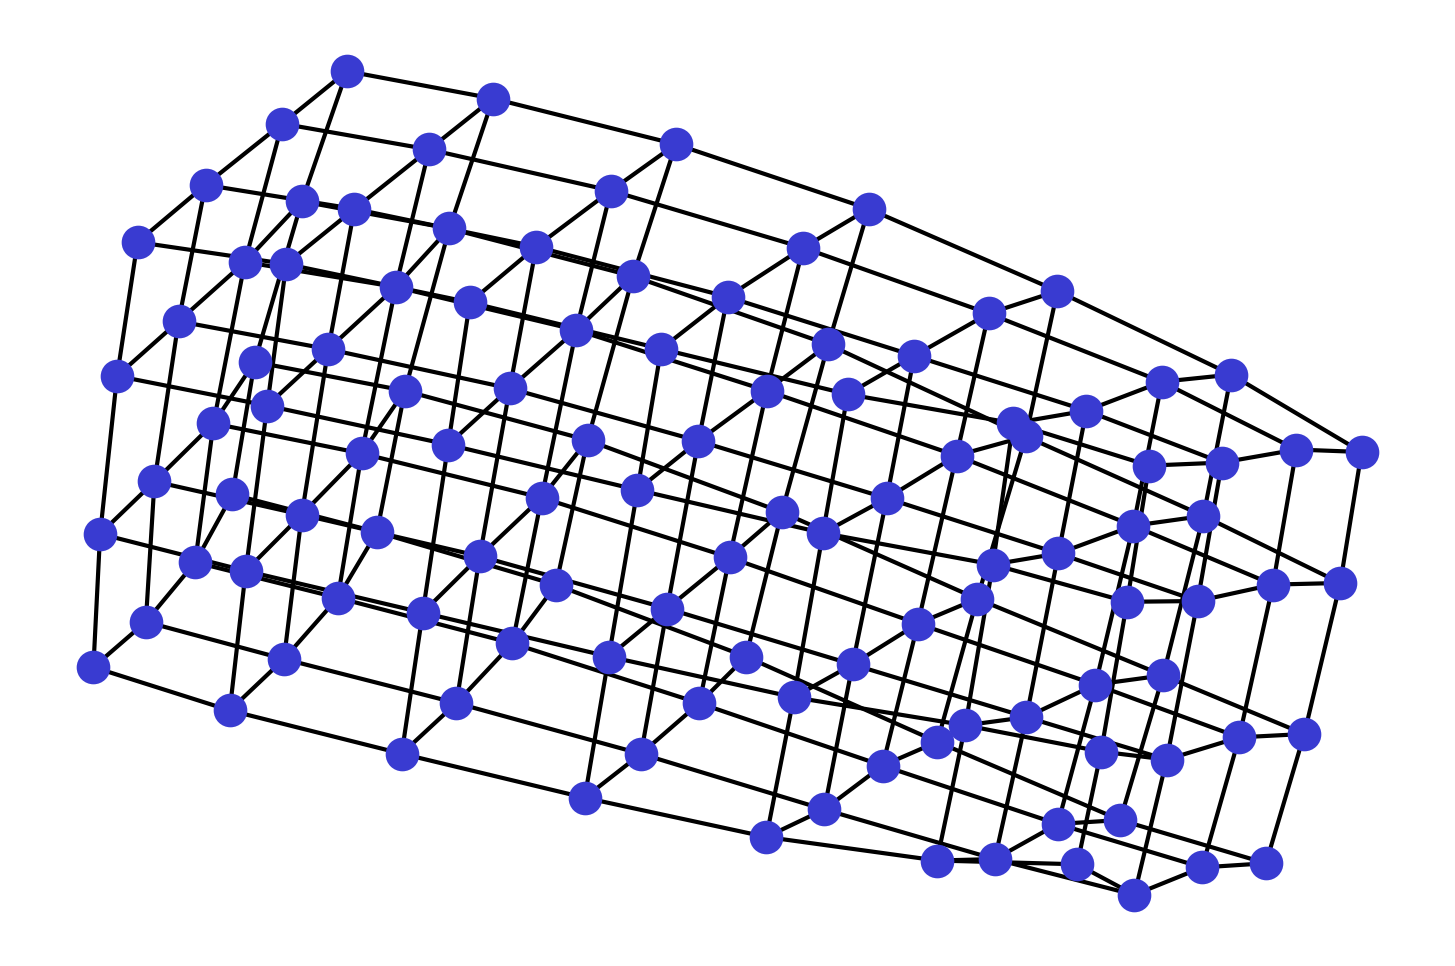

In [7]:
fig = plt.figure()
ax = fig.subplots()
G = nx.grid_graph(dim=(7, 4, 4))
nx.draw_spring(G, node_size=50, ax=ax, node_color=BLUE_COLOR)
fig.savefig("images/3d_lattice.png")

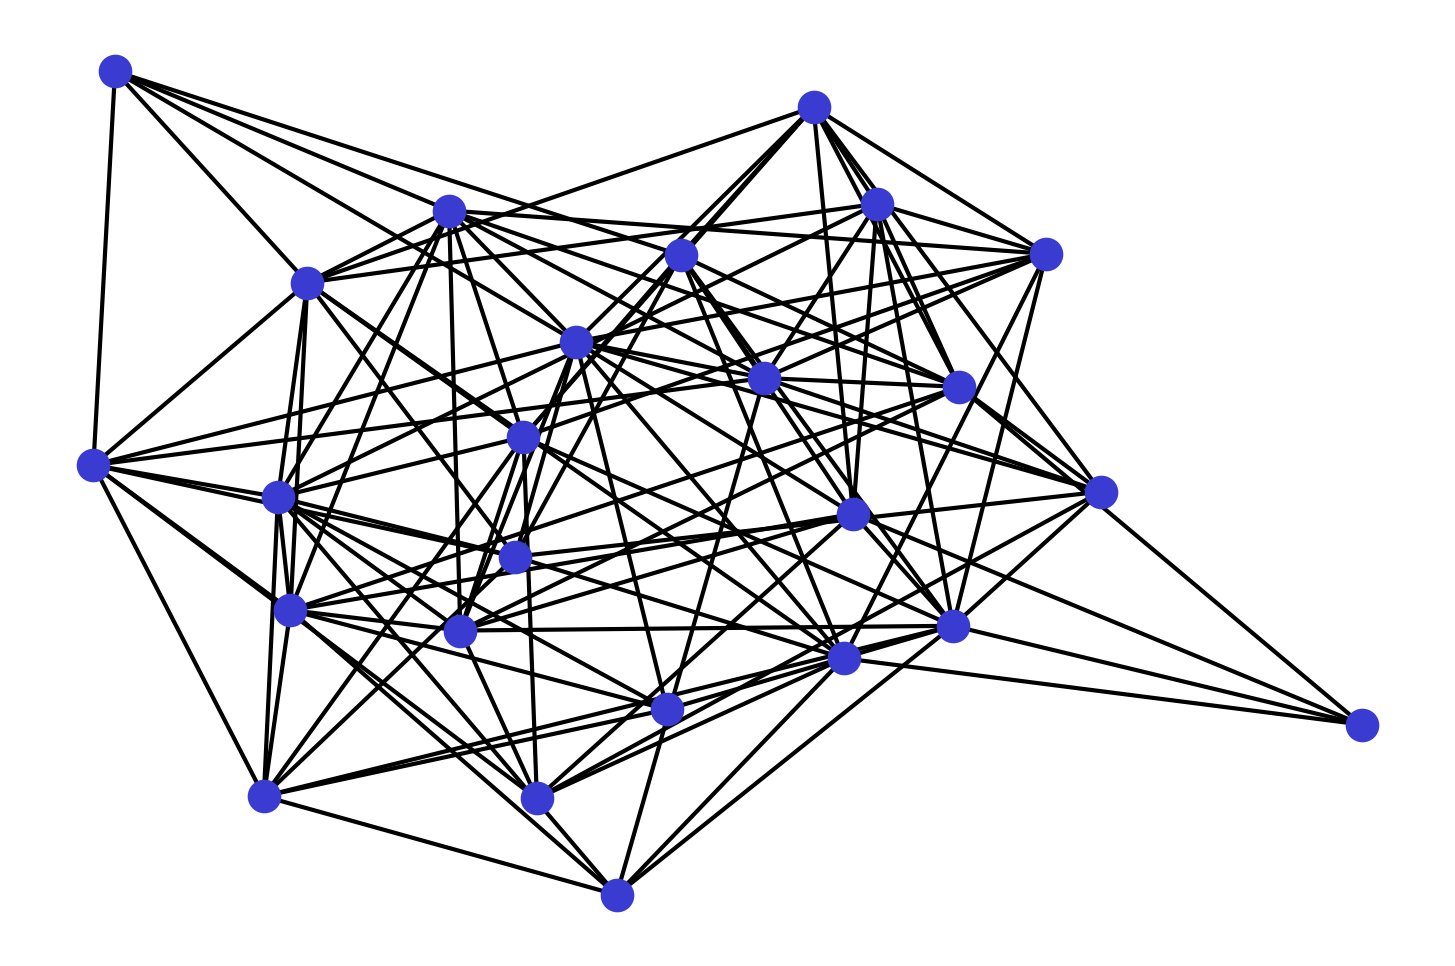

In [8]:
fig = plt.figure()
ax = fig.subplots()
G = nx.binomial_graph(25, .3)
nx.draw_spring(G, node_size=50, ax=ax, node_color=BLUE_COLOR)
fig.savefig("images/random_graph.png")

In [9]:
n = np.arange(0, 500)

one_d_lattice_avg_degree = n
two_d_lattice_avg_degree = np.sqrt(n)
three_d_lattice_avg_degree = np.power(n, 1/3)
random_graph_avg_degree = np.log1p(n) / 3

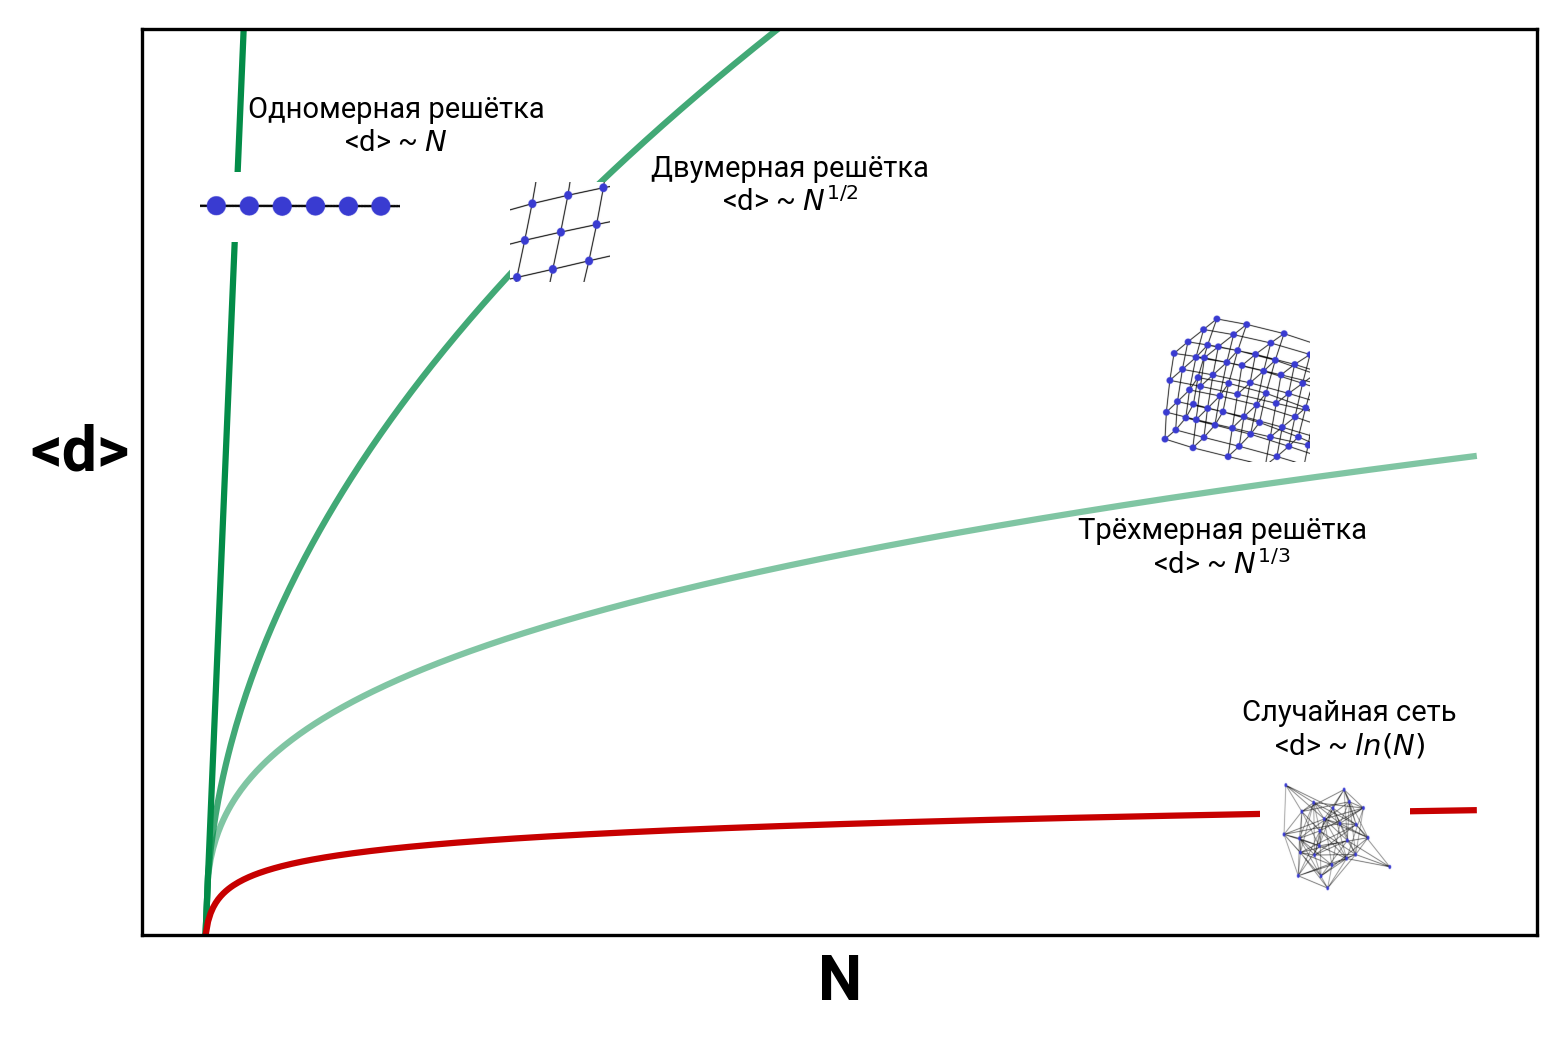

In [10]:
plt.plot(n, one_d_lattice_avg_degree, c=GREEN_COLOR, alpha=1, label="Одномерная решётка")
plt.plot(n, two_d_lattice_avg_degree, c=GREEN_COLOR, alpha=0.75, label="Двумерная решётка")
plt.plot(n, three_d_lattice_avg_degree, c=GREEN_COLOR, alpha=0.5, label="Трёхмерная решётка")
plt.plot(n, random_graph_avg_degree, c=RED_COLOR, label="Случайная сеть")

plt.ylim(0, 15)

plt.text(75, 13, "Одномерная решётка\n<d> ~ $N$", horizontalalignment="center")
plt.text(230, 12, "Двумерная решётка\n<d> ~ $N^{1/2}$", horizontalalignment="center")
plt.text(400, 6, "Трёхмерная решётка\n<d> ~ $N^{1/3}$", horizontalalignment="center")
plt.text(450, 3, "Случайная сеть\n<d> ~ $ln(N)$", horizontalalignment="center")

im_1d_lattice = plt.imread("images/1d_lattice_cut.png")
im_1d_lattice = resize(im_1d_lattice, (70, 200))
plt.figimage(im_1d_lattice, 200, 800)

im_2d_lattice = plt.imread("images/2d_lattice_cut.png")
im_2d_lattice = resize(im_2d_lattice, (100, 100))
plt.figimage(im_2d_lattice, 510, 760)

im_3d_lattice = plt.imread("images/3d_lattice_cut.png")
im_3d_lattice = resize(im_3d_lattice, (150, 150))
plt.figimage(im_3d_lattice, 1160, 580)

im_random_graph = plt.imread("images/random_graph.png")
im_random_graph = resize(im_random_graph, (150, 150))
plt.figimage(im_random_graph, 1260, 130)


# Remove ticks and labels
plt.xticks([], [])
plt.yticks([], [])

plt.xlabel("N", fontweight="bold")
plt.ylabel("<d>", rotation=0, fontweight="bold", labelpad=15)

plt.savefig("images/3_11.png")

# Изображение 3.12, Барабаши
![Figure 3-12](http://networksciencebook.com/images/ch-03/figure-3-12.jpg)

Source of the data: https://smg.media.mit.edu/library/milgram.smallworld.pdf

In [11]:
x = [0, 1, 2, 3,  4, 5,  6, 7, 8, 9, 10, 11]
y = [0, 2, 3, 8, 14, 8, 16, 6, 2, 2,  3,  0]

In [12]:
sum(y)  # Must be 64

64

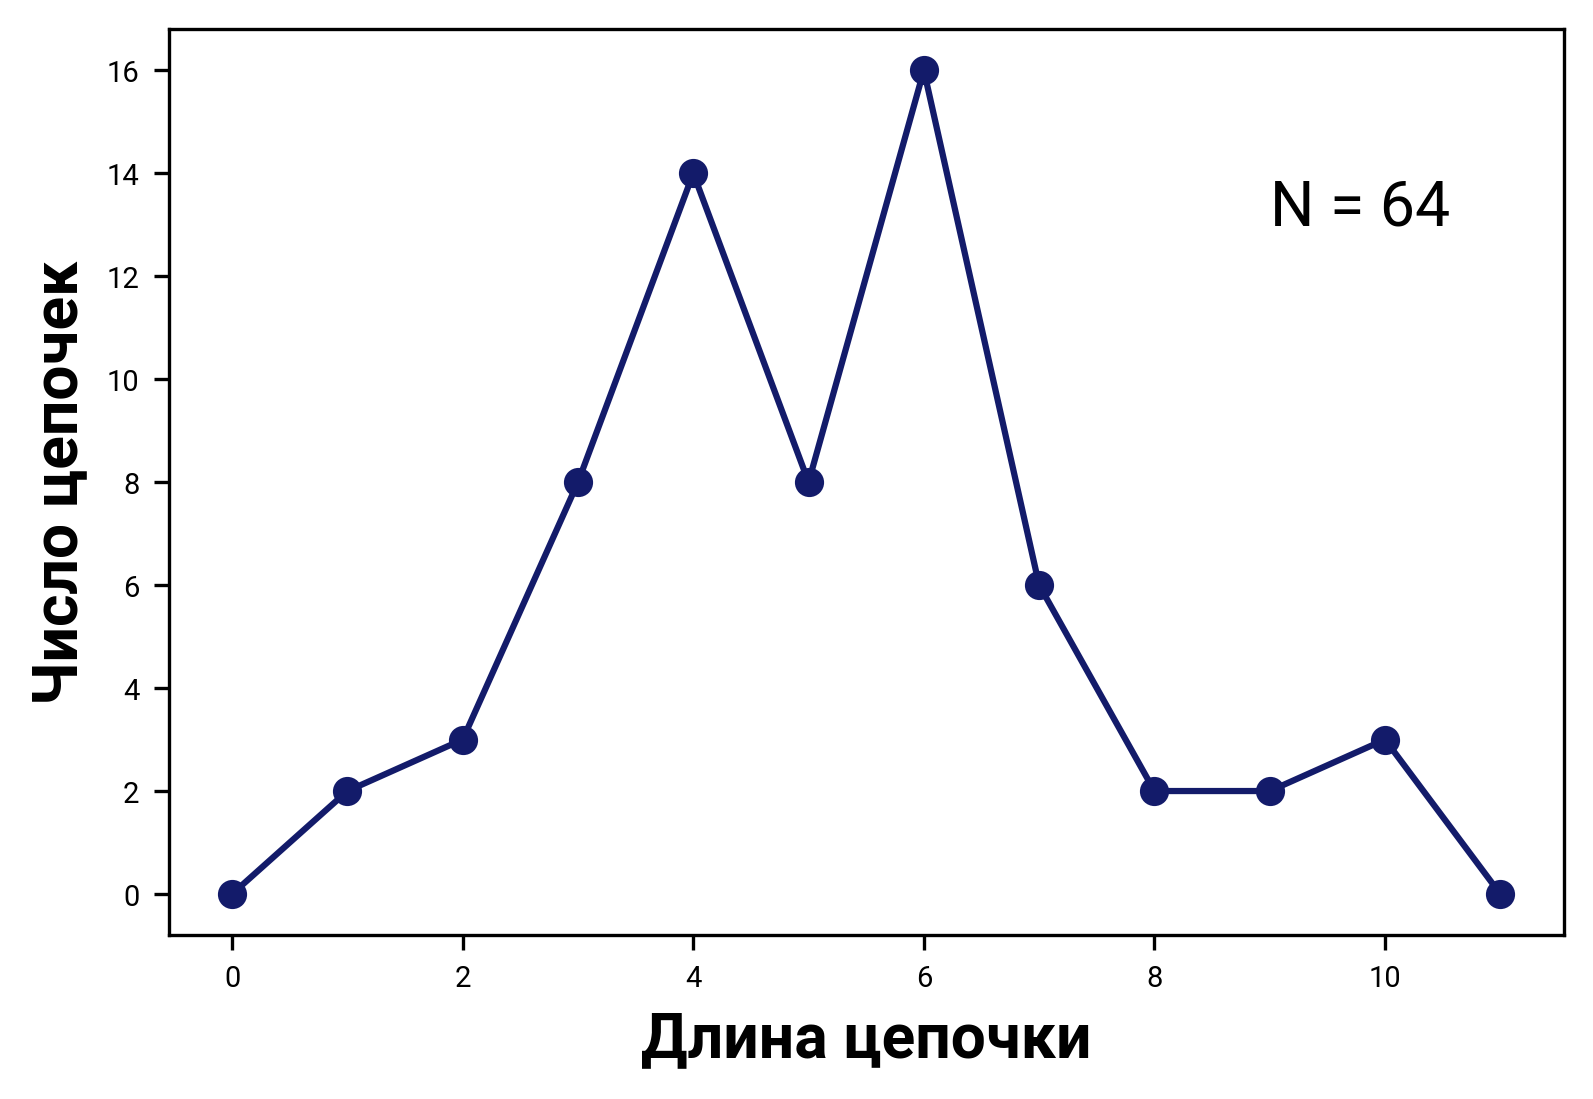

In [13]:
plt.plot(x, y, c=DARK_BLUE_COLOR, marker="o")
plt.xlabel("Длина цепочки")
plt.ylabel("Число цепочек")

plt.text(9, 13, "N = 64", fontsize=15)

plt.savefig("images/3_12.png")

In [14]:
ARRAY_SIZE = 10**5  # 10**5
N_ITERATIONS = 1000

In [15]:
ALPHA_1 = 1.3
ALPHA_2 = 2.2
ALPHA_3 = 3.5

no_mean_generator = powerlaw.Power_Law(discrete=False, parameters=[ALPHA_1])
no_var_generator = powerlaw.Power_Law(discrete=False, parameters=[ALPHA_2])
mean_and_var_generator = powerlaw.Power_Law(discrete=False, parameters=[ALPHA_3])

In [16]:
x = []
powerlaw_no_mean_means = []
powerlaw_no_var_means = []
powerlaw_var_mean_means = []

powerlaw_no_mean_vars = []
powerlaw_no_var_vars = []
powerlaw_var_mean_vars = []

for n_observations in tqdm(range(N_ITERATIONS)):
    x.append(n_observations)
    powerlaw_no_mean = no_mean_generator.generate_random(n_observations)
    powerlaw_no_var = no_var_generator.generate_random(n_observations)
    powerlaw_var_mean = mean_and_var_generator.generate_random(n_observations)

    powerlaw_no_mean_means.append(np.mean(powerlaw_no_mean))
    powerlaw_no_var_means.append(np.mean(powerlaw_no_var))
    powerlaw_var_mean_means.append(np.mean(powerlaw_var_mean))
    
    powerlaw_no_mean_vars.append(np.var(powerlaw_no_mean))
    powerlaw_no_var_vars.append(np.var(powerlaw_no_var))
    powerlaw_var_mean_vars.append(np.var(powerlaw_var_mean))

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\vladi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\vladi\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\vladi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\vladi\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\vladi\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
powerlaw_2_mean = (ALPHA_2 - 1) / (ALPHA_2 - 2)

powerlaw_3_mean = (ALPHA_3 - 1) / (ALPHA_3 - 2)
powerlaw_3_var = (ALPHA_3 - 2) / ((ALPHA_3 - 3) * (ALPHA_3 - 2)**2)

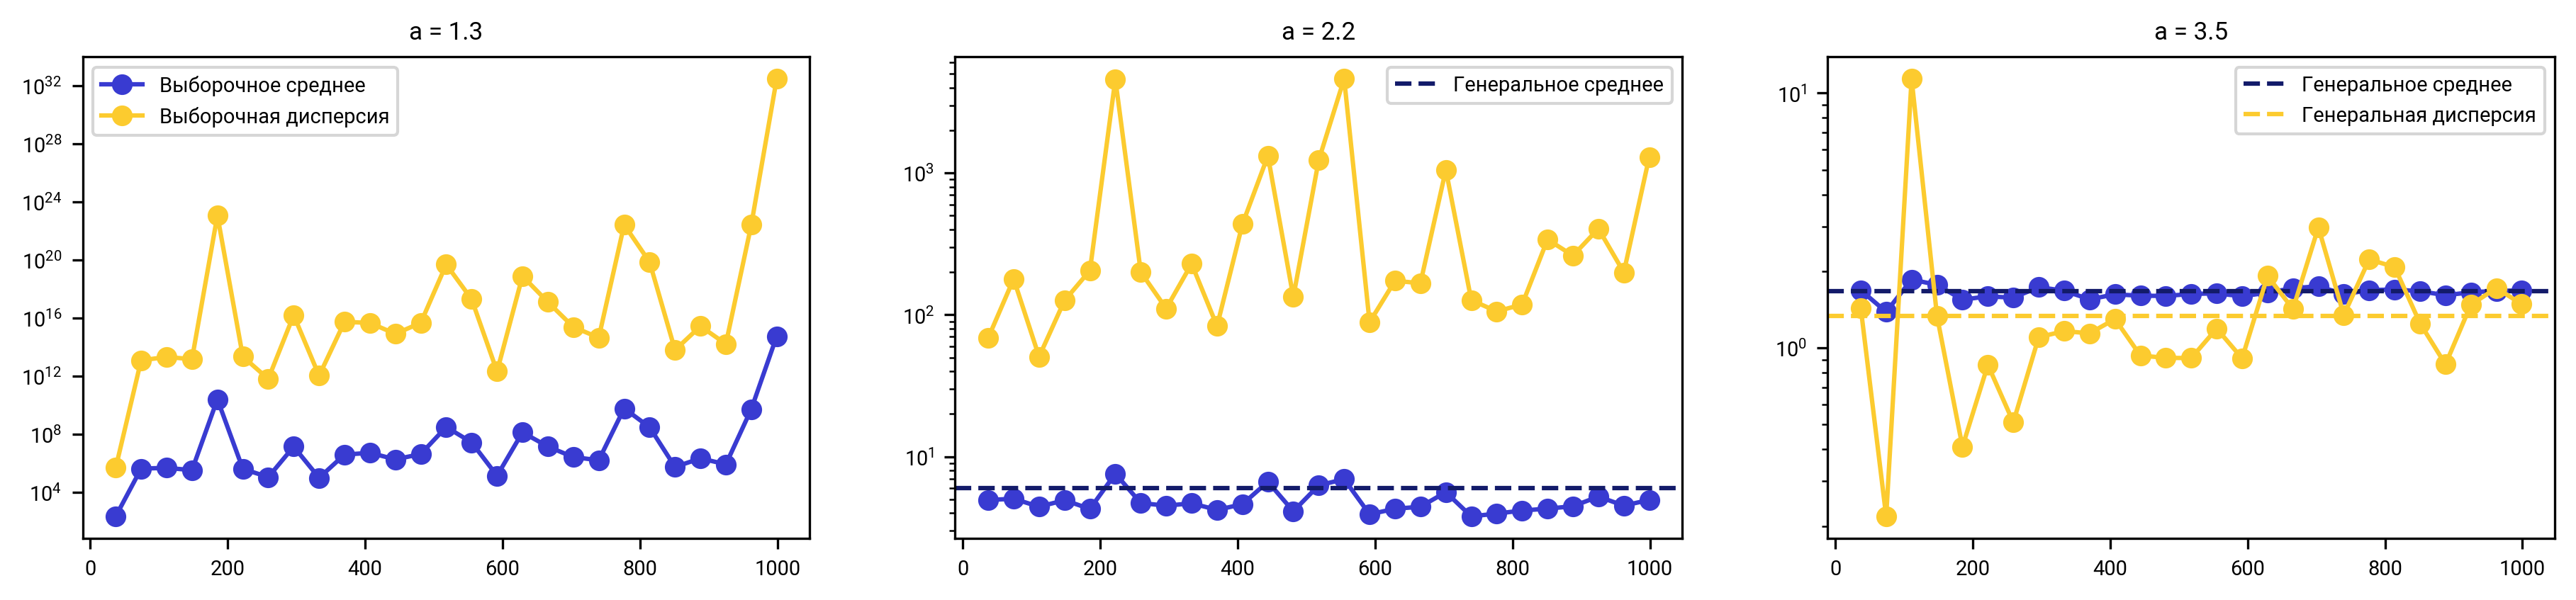

<Figure size 1800x1200 with 0 Axes>

In [30]:
STEP = 37

fig, axes = plt.subplots(ncols=3, figsize=(15, 3))

axes[0].plot(x[::STEP], powerlaw_no_mean_means[::STEP], c=BLUE_COLOR, marker="o", label="Выборочное среднее")
axes[0].plot(x[::STEP], powerlaw_no_mean_vars[::STEP], c=YELLOW_COLOR, marker="o", label="Выборочная дисперсия")
axes[0].legend()
axes[0].set_title(f"a = {ALPHA_1}")

axes[1].plot(x[::STEP], powerlaw_no_var_means[::STEP], c=BLUE_COLOR, marker="o")
axes[1].axhline(powerlaw_2_mean, c=DARK_BLUE_COLOR, linestyle="--", label="Генеральное среднее")
axes[1].plot(x[::STEP], powerlaw_no_var_vars[::STEP], c=YELLOW_COLOR, marker="o")
axes[1].legend()
axes[1].set_title(f"a = {ALPHA_2}")

axes[2].plot(x[::STEP], powerlaw_var_mean_means[::STEP], c=BLUE_COLOR, marker="o")
axes[2].axhline(powerlaw_3_mean, c=DARK_BLUE_COLOR, linestyle="--", label="Генеральное среднее")
axes[2].plot(x[::STEP], powerlaw_var_mean_vars[::STEP], c=YELLOW_COLOR, marker="o")
axes[2].axhline(powerlaw_3_var, c=YELLOW_COLOR, linestyle="--", label="Генеральная дисперсия")
axes[2].legend()
axes[2].set_title(f"a = {ALPHA_3}")

axes[0].set_yscale("log")
axes[1].set_yscale("log")
axes[2].set_yscale("log")

plt.show()
plt.savefig("images/powerlaw_parameters.png")

In [37]:
powerlaw_3_var

1.3333333333333333

In [38]:
np.mean(powerlaw_var_mean_vars[-100: ])

1.769942799930751

In [33]:
powerlaw_3_mean

1.6666666666666667

In [35]:
np.mean(powerlaw_var_mean_means[-100: ])

1.6627320330891797